In [36]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [37]:
data = {
    'Cutting speed (m/min)': [100, 99, 98, 97, 96],
    'Feed (mm/min)': [8, 75, 6, 6.5, 5.5],
    'Surface finish in (micro millimeter)': [30, 35, 40, 40, 38]
}

In [38]:
df = pd.DataFrame(data)
df

,Cutting speed (m/min),Feed (mm/min),Surface finish in (micro millimeter)
0,100,8.0,30
1,99,75.0,35
2,98,6.0,40
3,97,6.5,40
4,96,5.5,38


In [39]:
df.describe()

,Cutting speed (m/min),Feed (mm/min),Surface finish in (micro millimeter)
count,5.000000,5.000000,5.000000
mean,98.000000,20.200000,36.600000
std,1.581139,30.648409,4.219005
min,96.000000,5.500000,30.000000
25%,97.000000,6.000000,35.000000
50%,98.000000,6.500000,38.000000
75%,99.000000,8.000000,40.000000
max,100.000000,75.000000,40.000000


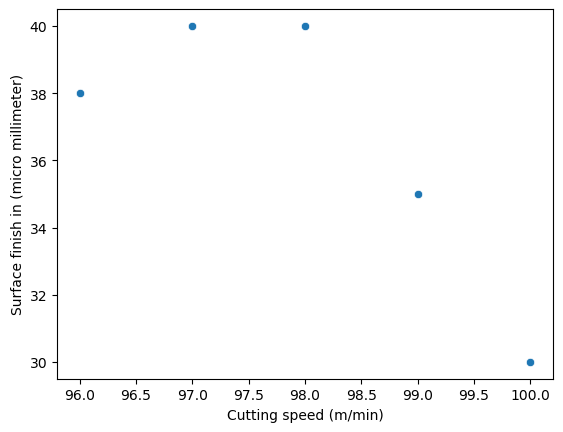

In [40]:
sns.scatterplot(x="Cutting speed (m/min)", y="Surface finish in (micro millimeter)", data=df)
plt.show()


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


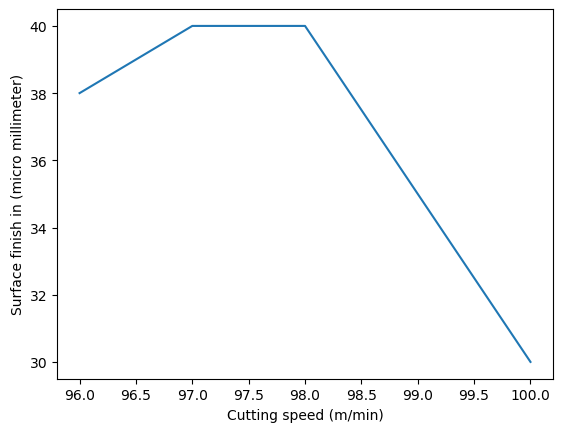

In [41]:
sns.lineplot(x="Cutting speed (m/min)", y="Surface finish in (micro millimeter)", data=df)
plt.show()

In [42]:
X = df[['Cutting speed (m/min)', 'Feed (mm/min)']]
y = df['Surface finish in (micro millimeter)']

In [43]:
LRmodel = LinearRegression()
LRmodel.fit(X, y)
print("Coefficients:", LRmodel.coef_)
print("Intercept:", LRmodel.intercept_)

Coefficients: [-2.17253872  0.00986921]
Intercept: 249.3094363668862


In [44]:
testDf = pd.DataFrame({'Cutting speed (m/min)': [105], 'Feed (mm/min)': [15]})
LRmodel.predict(testDf)

array([21.34090906])

In [45]:
print("Linear Regression Predicted surface finish for 105 m/min and 15 mm/min:", LRmodel.predict(testDf)[0])

Linear Regression Predicted surface finish for 105 m/min and 15 mm/min: 21.340909055586224


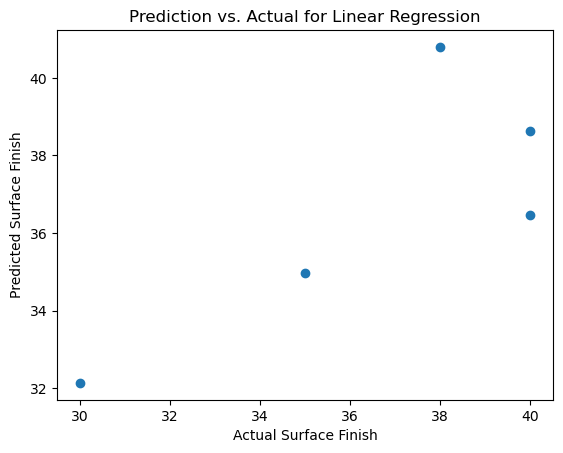

In [46]:
plt.scatter(y, LRmodel.predict(X))
plt.xlabel("Actual Surface Finish")
plt.ylabel("Predicted Surface Finish")
plt.title("Prediction vs. Actual for Linear Regression")
plt.show()


In [47]:
XGBmodel = XGBRegressor(objective='reg:squarederror')
XGBmodel.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
testDf = pd.DataFrame({'Cutting speed (m/min)': [105], 'Feed (mm/min)': [15]})
XGBmodel.predict(testDf)

array([30.001057], dtype=float32)

In [49]:
print("XGBoost Predicted surface finish for 105 m/min and 15 mm/min:", XGBmodel.predict(testDf)[0])

XGBoost Predicted surface finish for 105 m/min and 15 mm/min: 30.001057


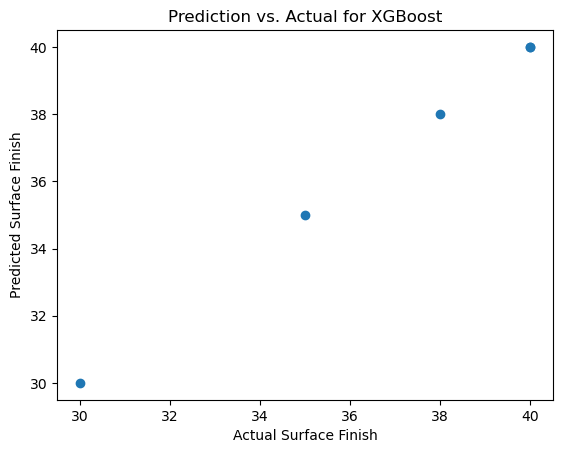

In [50]:
plt.scatter(y, XGBmodel.predict(X))
plt.xlabel("Actual Surface Finish")
plt.ylabel("Predicted Surface Finish")
plt.title("Prediction vs. Actual for XGBoost")
plt.show()
